In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Probability of the area of a triangle

Q: _break a bar long 1 metre in three pieces, and compute the probability that the three pieces can form a triangle with area less than $h$._

First of all, draw two $\mathcal U_{[0,1]}$ random variables $x$ and $y$, and by symmetry establish that
$$\mathbb P(\text{triangle with area }<h)=\mathbb P(\text{triangle with area }<h|x<y)\mathbb P(x<y)+\mathbb P(\text{triangle with area }<h|x\geq y)\mathbb P(x\geq y)=
\\2\cdot\mathbb P(\text{triangle with area }<h|x<y)\mathbb P(x<y)=\mathbb P(\text{triangle with area }<h|x<y),$$
so draw two numbers and sort them, the first is called $x$ and the second is $y$. The first side of the triangle will be $x$, the second $y-x$, the third $1-y$. Therefore, the sample space can be reduced to $\Omega:=([0,1]\times[0,1])\cap\{x<y\}$.

A triangle is feasible if: $x<y-x+1-y\Rightarrow x<\frac12$, $y-x<x+1-y\Rightarrow y<x+\frac12$, $1-y<x+y-x\Rightarrow y>\frac12$. So, the portion of $\Omega$ containing feasible triangles is $T:=\left(\left[0,\frac12\right]\times\left[\frac12,1\right]\right)\cap\left\{y<x+\frac12\right\}$. Side note, the solution of the riddle _compute the chance of obtaining a feasible triangle_ would be $\mathbb P(T)/\mathbb P(\Omega)$. And the drawing below confirms that the probability of a feasible triangle is $\frac14$.

Using Heron's formula, one can get the area, and compare it to $h$. The triangle maximising area for a given perimeter is the equilateral, so $\hat x=\frac 13,\,\hat y=\frac23$ is the draw with maximum area, and $A=\frac{\sqrt 3}4 \hat x^2\approx 0.048$.

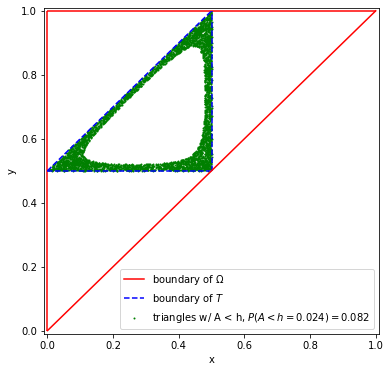

In [65]:
h_max = np.sqrt(3)/4/9
h = h_max/2

punti_x = []
punti_y = []
tot     = 0
sample  = 50000

for i in range(0, sample):
    x, y = np.sort(np.random.uniform(size = 2))
    if x < 0.5 and y > 0.5 and y < x + 0.5:
        A = np.sqrt(0.5*(0.5 - x)*(0.5-(y-x))*(0.5-(1-y)))
        if A < h:
            tot += 1
            punti_x.append(x)
            punti_y.append(y)
        
plt.figure(figsize=(6,6))
plt.xlim((-0.01,1.01))
plt.ylim((-0.01,1.01))
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(punti_x, punti_y, s = 1, color = 'green', label =r"triangles w/ A < h, $P(A<h={:.3f})=${:.3f}".format(h,tot/sample))

plt.hlines(1,0,1,color='red')
plt.vlines(0,0,1,color='red')
plt.plot((0,1),(0,1),color='red',label='boundary of $\Omega$')

plt.hlines(0.5,0,0.5,color='blue',linestyles='dashed')
plt.vlines(0.5,0.5,1,color='blue',linestyles='dashed')
plt.plot((0,0.5),(0.5,1),color='blue',linestyle='dashed',label='boundary of $T$')

plt.legend(loc='lower right')
plt.show()